<a href="https://colab.research.google.com/github/kevinash/awesome-ai/blob/main/notebooks/5_FacesAndExpressions/CustomizableToonFaces_cartoonset100k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set to False to use doc2vec embeddings

In [1]:
USE_ONEHOT = True

#Run this stuff


In [2]:
!git clone https://github.com/NVLabs/stylegan2 /content/stylegan2

Cloning into '/content/stylegan2'...
remote: Enumerating objects: 127, done.
remote: Total 127 (delta 0), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (127/127), 591.90 KiB | 10.38 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [3]:
%tensorflow_version 1.x
%cd /content/stylegan2

TensorFlow 1.x selected.
/content/stylegan2


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec
import warnings
warnings.filterwarnings('ignore')

In [5]:
import gdown
gdown.download('https://drive.google.com/uc?id=1Y5sej5TvdQ2JDHO4HrXvdzhXF9rVV8Aw', 'network-cartoonset100k-onehot.pkl', quiet=False)
gdown.download('https://drive.google.com/uc?id=1ZkUGucROLHjnScroWAQR1J8LOz0LLIGo', 'network-cartoonset100k-doc2vec.pkl', quiet=False)
gdown.download('https://drive.google.com/uc?id=1xnbUsO-jpIjFV6zFQeOQNxjsIOpLMAfA', 'cartoonset.d2v', quiet=False)
gdown.download('https://drive.google.com/uc?id=1B3usl_RhsSl-058IoOnk5gTaUE8hI4RJ', 'cartoonset.d2v.docvecs.vectors_docs.npy', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Y5sej5TvdQ2JDHO4HrXvdzhXF9rVV8Aw
To: /content/stylegan2/network-cartoonset100k-onehot.pkl
352MB [00:03, 93.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZkUGucROLHjnScroWAQR1J8LOz0LLIGo
To: /content/stylegan2/network-cartoonset100k-doc2vec.pkl
352MB [00:03, 109MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xnbUsO-jpIjFV6zFQeOQNxjsIOpLMAfA
To: /content/stylegan2/cartoonset.d2v
6.95MB [00:00, 40.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1B3usl_RhsSl-058IoOnk5gTaUE8hI4RJ
To: /content/stylegan2/cartoonset.d2v.docvecs.vectors_docs.npy
51.2MB [00:00, 93.7MB/s]


'cartoonset.d2v.docvecs.vectors_docs.npy'

In [6]:
model = Doc2Vec.load("cartoonset.d2v")

In [7]:
import ipywidgets as widgets
import pretrained_networks
import PIL.Image
import numpy as np
network_pkl = 'network-cartoonset100k-onehot.pkl'
if not USE_ONEHOT:
    network_pkl = 'network-cartoonset100k-doc2vec.pkl'
_G, _D, Gs = pretrained_networks.load_networks(network_pkl)
import dnnlib
import dnnlib.tflib as tflib
Gs_syn_kwargs = dnnlib.EasyDict()
batch_size = 1
Gs_syn_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
Gs_syn_kwargs.randomize_noise = True
Gs_syn_kwargs.minibatch_size = batch_size

noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]

def generate_sample(labels, seed=0):
    new_im = PIL.Image.new('RGB', (128, 128))
    
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    rnd = np.random.RandomState(seed)
    tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]
    batch_size = 1
    all_seeds = [seed] * batch_size
    all_z = np.stack([np.random.RandomState(seed).randn(*Gs.input_shape[1:]) for seed in all_seeds]) # [minibatch, component]
    all_w = Gs.components.mapping.run(all_z, np.tile(labels, (batch_size, 1))) # [minibatch, layer, component]
    l = np.matrix(labels)
    all_images = Gs.run(all_z, l, **Gs_kwargs)
    new_im.paste(PIL.Image.fromarray(np.median(all_images, axis=0).astype(np.uint8)), (0, 0))
    display(new_im)
    return new_im

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.


In [8]:
cols = [
 'g_chin_length=0',
 'g_chin_length=1',
 'g_chin_length=2',
 'g_eye_angle=0',
 'g_eye_angle=1',
 'g_eye_angle=2',
 'g_eye_color=0',
 'g_eye_color=1',
 'g_eye_color=2',
 'g_eye_color=3',
 'g_eye_color=4',
 'g_eye_eyebrow_distance=0',
 'g_eye_eyebrow_distance=1',
 'g_eye_eyebrow_distance=2',
 'g_eye_lashes=0',
 'g_eye_lashes=1',
 'g_eye_lid=0',
 'g_eye_lid=1',
 'g_eye_slant=0',
 'g_eye_slant=1',
 'g_eye_slant=2',
 'g_eyebrow_shape=0',
 'g_eyebrow_shape=1',
 'g_eyebrow_shape=10',
 'g_eyebrow_shape=11',
 'g_eyebrow_shape=12',
 'g_eyebrow_shape=13',
 'g_eyebrow_shape=2',
 'g_eyebrow_shape=3',
 'g_eyebrow_shape=4',
 'g_eyebrow_shape=5',
 'g_eyebrow_shape=6',
 'g_eyebrow_shape=7',
 'g_eyebrow_shape=8',
 'g_eyebrow_shape=9',
 'g_eyebrow_thickness=0',
 'g_eyebrow_thickness=1',
 'g_eyebrow_thickness=2',
 'g_eyebrow_thickness=3',
 'g_eyebrow_weight=0',
 'g_eyebrow_weight=1',
 'g_eyebrow_width=0',
 'g_eyebrow_width=1',
 'g_eyebrow_width=2',
 'g_face_color=0',
 'g_face_color=1',
 'g_face_color=10',
 'g_face_color=2',
 'g_face_color=3',
 'g_face_color=4',
 'g_face_color=5',
 'g_face_color=6',
 'g_face_color=7',
 'g_face_color=8',
 'g_face_color=9',
 'g_face_shape=0',
 'g_face_shape=1',
 'g_face_shape=2',
 'g_face_shape=3',
 'g_face_shape=4',
 'g_face_shape=5',
 'g_face_shape=6',
 'g_facial_hair=0',
 'g_facial_hair=1',
 'g_facial_hair=10',
 'g_facial_hair=11',
 'g_facial_hair=12',
 'g_facial_hair=13',
 'g_facial_hair=14',
 'g_facial_hair=2',
 'g_facial_hair=3',
 'g_facial_hair=4',
 'g_facial_hair=5',
 'g_facial_hair=6',
 'g_facial_hair=7',
 'g_facial_hair=8',
 'g_facial_hair=9',
 'g_glasses=0',
 'g_glasses=1',
 'g_glasses=10',
 'g_glasses=11',
 'g_glasses=2',
 'g_glasses=3',
 'g_glasses=4',
 'g_glasses=5',
 'g_glasses=6',
 'g_glasses=7',
 'g_glasses=8',
 'g_glasses=9',
 'g_glasses_color=0',
 'g_glasses_color=1',
 'g_glasses_color=2',
 'g_glasses_color=3',
 'g_glasses_color=4',
 'g_glasses_color=5',
 'g_glasses_color=6',
 'g_hair=0',
 'g_hair=1',
 'g_hair=10',
 'g_hair=100',
 'g_hair=101',
 'g_hair=102',
 'g_hair=103',
 'g_hair=104',
 'g_hair=105',
 'g_hair=106',
 'g_hair=107',
 'g_hair=108',
 'g_hair=109',
 'g_hair=11',
 'g_hair=110',
 'g_hair=12',
 'g_hair=13',
 'g_hair=14',
 'g_hair=15',
 'g_hair=16',
 'g_hair=17',
 'g_hair=18',
 'g_hair=19',
 'g_hair=2',
 'g_hair=20',
 'g_hair=21',
 'g_hair=22',
 'g_hair=23',
 'g_hair=24',
 'g_hair=25',
 'g_hair=26',
 'g_hair=27',
 'g_hair=28',
 'g_hair=29',
 'g_hair=3',
 'g_hair=30',
 'g_hair=31',
 'g_hair=32',
 'g_hair=33',
 'g_hair=34',
 'g_hair=35',
 'g_hair=36',
 'g_hair=37',
 'g_hair=38',
 'g_hair=39',
 'g_hair=4',
 'g_hair=40',
 'g_hair=41',
 'g_hair=42',
 'g_hair=43',
 'g_hair=44',
 'g_hair=45',
 'g_hair=46',
 'g_hair=47',
 'g_hair=48',
 'g_hair=49',
 'g_hair=5',
 'g_hair=50',
 'g_hair=51',
 'g_hair=52',
 'g_hair=53',
 'g_hair=54',
 'g_hair=55',
 'g_hair=56',
 'g_hair=57',
 'g_hair=58',
 'g_hair=59',
 'g_hair=6',
 'g_hair=60',
 'g_hair=61',
 'g_hair=62',
 'g_hair=63',
 'g_hair=64',
 'g_hair=65',
 'g_hair=66',
 'g_hair=67',
 'g_hair=68',
 'g_hair=69',
 'g_hair=7',
 'g_hair=70',
 'g_hair=71',
 'g_hair=72',
 'g_hair=73',
 'g_hair=74',
 'g_hair=75',
 'g_hair=76',
 'g_hair=77',
 'g_hair=78',
 'g_hair=79',
 'g_hair=8',
 'g_hair=80',
 'g_hair=81',
 'g_hair=82',
 'g_hair=83',
 'g_hair=84',
 'g_hair=85',
 'g_hair=86',
 'g_hair=87',
 'g_hair=88',
 'g_hair=89',
 'g_hair=9',
 'g_hair=90',
 'g_hair=91',
 'g_hair=92',
 'g_hair=93',
 'g_hair=94',
 'g_hair=95',
 'g_hair=96',
 'g_hair=97',
 'g_hair=98',
 'g_hair=99',
 'g_hair_color=0',
 'g_hair_color=1',
 'g_hair_color=2',
 'g_hair_color=3',
 'g_hair_color=4',
 'g_hair_color=5',
 'g_hair_color=6',
 'g_hair_color=7',
 'g_hair_color=8',
 'g_hair_color=9'
]

In [9]:
import collections
prefixes = []
for col in cols:
    prefix = col[2:].split("=")[0]
    prefixes.append(prefix)
pre_counter = collections.Counter(prefixes)

# Play around with the model

['chin_length=3', 'eye_angle=2', 'eye_color=3', 'eye_eyebrow_distance=2', 'eye_lashes=2', 'eye_lid=1', 'eye_slant=0', 'eyebrow_shape=8', 'eyebrow_thickness=0', 'eyebrow_weight=0', 'eyebrow_width=1', 'face_color=9', 'face_shape=3', 'facial_hair=10', 'glasses=3', 'glasses_color=4', 'hair=88', 'hair_color=5']


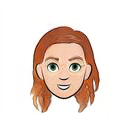

In [14]:
#@title Customize your player { run: "auto" }
chin_length = 3 #@param {type:"slider", step:1, min:0, max: 3}
eye_angle = 2 #@param {type:"slider", step:1, min:0, max: 3}
eye_color = 3 #@param {type:"slider", step:1, min:0, max: 5}
eye_eyebrow_distance = 2 #@param {type:"slider", step:1, min:0, max: 3}
eye_lashes = 2 #@param {type:"slider", step:1, min:0, max: 2}
eye_lid = 1 #@param {type:"slider", step:1, min:0, max: 2}
eye_slant = 0 #@param {type:"slider", step:1, min:0, max: 3}
eyebrow_shape = 8 #@param {type:"slider", step:1, min:0, max: 14}
eyebrow_thickness = 0 #@param {type:"slider", step:1, min:0, max: 4}
eyebrow_weight = 0 #@param {type:"slider", step:1, min:0, max: 2}
eyebrow_width = 1 #@param {type:"slider", step:1, min:0, max: 3}
face_color = 9 #@param {type:"slider", step:1, min:0, max: 11}
face_shape = 3 #@param {type:"slider", step:1, min:0, max: 7}
facial_hair = 10 #@param {type:"slider", step:1, min:0, max: 15}
glasses = 3 #@param {type:"slider", step:1, min:0, max: 12}
glasses_color = 4 #@param {type:"slider", step:1, min:0, max: 7}
hair = 88 #@param {type:"slider", step:1, min:0, max: 111}
hair_color = 5 #@param {type:"slider", step:1, min:0, max: 10}

one_hot_array = np.zeros(217)
tags = []
accum = 0
for pre, count in pre_counter.items():
    #print(pre, count)
    index = accum + globals()[pre]
    one_hot_array[index] = 1
    accum += count
    string_tag = pre + "=" + str(globals()[pre])
    tags.append(string_tag)
    
tag_vec = model.infer_vector(tags)
print(tags)
#one_hot_array
if USE_ONEHOT:
    generate_sample(one_hot_array)
else:
    generate_sample(tag_vec)
